Adjacency Matrix Shape: (4039, 4039)
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


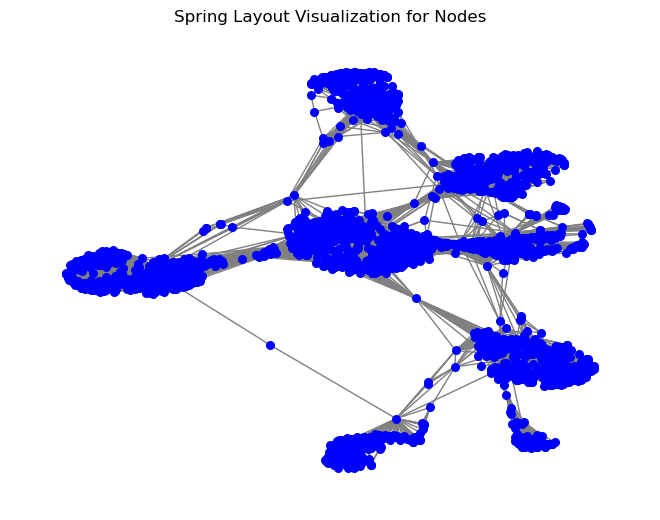

In [71]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the data
edge_list_file = "facebook_combined.txt"  # Path to your dataset
graph = nx.read_edgelist(edge_list_file, nodetype=int)

# Create adjacency matrix
adj_matrix = nx.adjacency_matrix(graph).toarray()

# Save or display the matrix
print("Adjacency Matrix Shape:", adj_matrix.shape)
print(adj_matrix)  # Or save to a file if needed

sampled_nodes = list(graph.nodes)
sampled_subgraph = graph.subgraph(sampled_nodes)

# Using spring layout
pos = nx.spring_layout(sampled_subgraph, seed=42)  # Seed for consistent layout
nx.draw(
    sampled_subgraph,
    pos,
    with_labels=False,
    node_size=30,
    node_color='blue',
    edge_color='gray'
)
plt.title("Spring Layout Visualization for Nodes")
plt.show()

In [73]:
def leader_rank_linear_algebra(adj_matrix, max_iter=100000, tol=1e-6):
    # Add a virtual supernode
    n = adj_matrix.shape[0]
    augmented_matrix = np.zeros((n + 1, n + 1))
    augmented_matrix[:n, :n] = adj_matrix
    
    # Connect the supernode to all other nodes with bidirectional links
    augmented_matrix[n, :n] = 1
    augmented_matrix[:n, n] = 1
    
    # Normalize the adjacency matrix to create a transition matrix
    degree = np.sum(augmented_matrix, axis=1)
    transition_matrix = augmented_matrix / degree[:, None]
    
    # Use power iteration to compute steady-state rank vector
    ranks = np.ones(n + 1) / (n + 1)  # Uniform initialization
    for iteration in range(max_iter):
        new_ranks = np.dot(transition_matrix.T, ranks)  # Linear algebra multiplication
        
        # Check for convergence
        if np.linalg.norm(new_ranks - ranks, 2) < tol:
            break
        
        ranks = new_ranks
    
    # Remove the supernode's rank and normalize remaining ranks
    final_ranks = ranks[:n] / np.sum(ranks[:n])
    
    return final_ranks

In [119]:
import numpy as np
import pandas as pd

# Load the adjacency matrix and node names from the provided Excel file
# file_path = 'Facebook_Data.xlsx'  

# # Read the Excel file
# data = pd.read_excel(file_path, header=0)

# # Extract node names (first column/row)
# node_names = data.columns[1:]  # Exclude the first column header
# adj_matrix = data.iloc[:, 1:].to_numpy()  # Extract the adjacency matrix as numpy array

# # Ensure the adjacency matrix is float
# adj_matrix = adj_matrix.astype(float)

# Run LeaderRank algorithm on the adjacency matrix
leader_scores = leader_rank_linear_algebra(adj_matrix)

# Combine the results into a single DataFrame
results_combined = pd.DataFrame({
    'LeaderRank Score': leader_scores
})

top_20_results = results_combined.sort_values(by='LeaderRank Score', ascending=False).head(20)
top_20_nodes_set = set(top_20_results.index)
# Display top 10 nodes
print("Top 20 nodes by LeaderRank Score:")
print(top_20_results)

Top 20 nodes by LeaderRank Score:
      LeaderRank Score
107           0.005806
351           0.004401
352           0.004176
1821          0.003039
0             0.001929
1490          0.001628
2154          0.001612
1373          0.001416
1285          0.001366
1149          0.001310
838           0.001305
2145          0.001297
366           0.001288
348           0.001276
1215          0.001260
2995          0.001242
2126          0.001237
3169          0.001230
917           0.001227
3106          0.001225


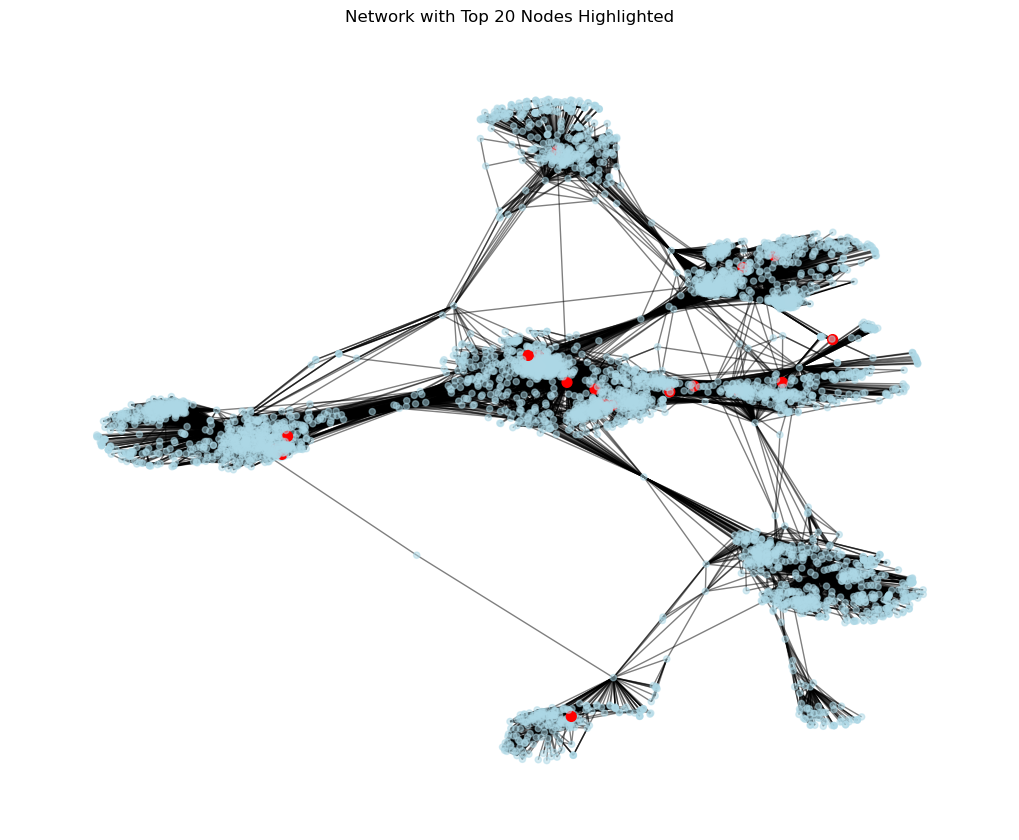

In [125]:
# Create a position dictionary for the entire graph
# Visualize the graph
top_nodes_viz = top_20_nodes_set

plt.figure(figsize=(10, 8))
nx.draw(
    graph,
    pos,
    node_color=['red' if node in top_nodes_viz else 'lightblue' for node in graph.nodes()],
    node_size=[50 if node in top_nodes_viz else 20 for node in graph.nodes()],
    with_labels=False,
    alpha=[1.0 if node in top_nodes_viz else 0.5 for node in graph.nodes()]
)
plt.title("Network with Top 20 Nodes Highlighted")
plt.show()

In [10]:
# Save results to an Excel file
output_file_path = 'LeaderRank_Scores.xlsx'  
results_combined.to_excel(output_file_path, index=False)

print(f"Results saved to {output_file_path}")

Results saved to LeaderRank_Scores.xlsx
